# COMP 135 Fall 2019: HW1 STARTER

# Setup comp135_env package imports

In [53]:
import os
import numpy as np
import sklearn.neighbors
import sklearn.tree

from matplotlib import pyplot as plt
import seaborn as sns

In [54]:
%matplotlib inline

# Setup student-defined imports

In [55]:
from LeastSquaresLinearRegression import LeastSquaresLinearRegressor

In [56]:
from evaluate_perf_metrics import (
    calc_perf_metric__absolute_error, calc_perf_metric__squared_error,
    calc_perf_metrics_for_regressor_on_dataset)

# Load dataset

In [57]:
## TODO load all data (train/valid/test) into x_tr_NF, x_va_NF, x_te_NF, ...

In [58]:
y_tr_N = np.loadtxt('data_abalone/y_train.csv', delimiter=',', skiprows=1)
y_va_N = np.loadtxt('data_abalone/y_valid.csv', delimiter=',', skiprows=1)
y_te_N = np.loadtxt('data_abalone/y_test.csv' , delimiter=',', skiprows=1)

In [59]:
# Print first five to check loading
#print(y_tr_N[0:5],'\n',y_va_N[0:5], '\n', y_te_N[0:5])

In [60]:
x_tr_NF = np.loadtxt('data_abalone/x_train.csv', delimiter=',', skiprows=1)
x_va_NF = np.loadtxt('data_abalone/x_valid.csv', delimiter=',', skiprows=1)
x_te_NF = np.loadtxt('data_abalone/x_test.csv' , delimiter=',', skiprows=1)

In [61]:
# Print first five to check loading
#print(x_tr_NF[0:5],'\n\n',x_va_NF[0:5], '\n\n', x_te_NF[0:5])

# 1a : Abalone histograms of response variable 'rings'

#### 1a(i): Produce one figure with three subplots, showing histograms of $y$ from train/valid/test

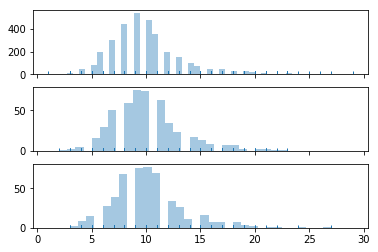

In [63]:
fig1a, axes_arr = plt.subplots(nrows=3, ncols=1, sharex=True)

## TODO plot histograms on the axes
sns.distplot(y_tr_N, bins=None, kde=False, rug=True, ax=axes_arr[0]);
sns.distplot(y_va_N, bins=None, kde=False, rug=True, ax=axes_arr[1]);
sns.distplot(y_te_N, bins=None, kde=False, rug=True, ax=axes_arr[2]);

#### 1a(ii): Describe the **train** distribution. Unimodal or multimodal? What shape? Are there noticeable outliers?

This is Unimodal. I think the shape looks like a Gamma Distribution. I don't spot outliers. 

#### 1a(iii): Quantify train's descriptive statistics. 

In [64]:
print('Mean:   ', np.mean(y_tr_N))
print('Median: ', np.median(y_tr_N))
print('Min:    ', np.min(y_tr_N))
print('Max:    ', np.max(y_tr_N))

Mean:    9.902392947103275
Median:  9.0
Min:     1.0
Max:     29.0


# 1b : Scatterplots of 'rings' vs 'diam' and 'rings' vs 'shucked'

#### **1b(i):** Create figure with two subplots: scatter plot of `diam_mm` vs `rings` and scatter of `shucked_weight_g` vs `rings`.

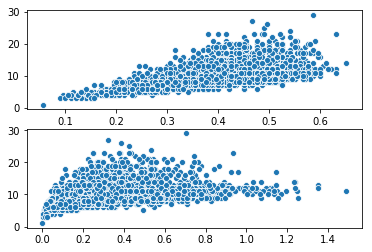

In [65]:
fig1b, axes_arr = plt.subplots(nrows=2, ncols=1, sharex=False)

sns.scatterplot(x_tr_NF[:,2],y_tr_N, ax=axes_arr[0]);
sns.scatterplot(x_tr_NF[:,5],y_tr_N, ax=axes_arr[1]);

#### **1b(ii):** Describe the trends you between diameter and rings in a few sentences.

There seems a linear behavior in the plot(i.e the larger the diam_mm is, the larger the number of rings is). However, the larger the diam_mm is, the more the number of rings diverges.

#### 1b(iii): Describe the trends you see between shucked weight and rings.


There is not a very obvious pattern I can see. For shucked weight between 0.2 and 0.8, the distribution of data points is pretty the same. (i.e Number of rings is not significantly affected by shucjed weight.) One can only spot a very small change there. It seems pretty flat on the lower half, decreasing on the top half in the figure.

# Setup code for 1c

In [66]:
## Dummy class to perform "always guess training mean" prediction
class MeanPredictor():
    def __init__(self):
        self.yhat = None
    
    def fit(self, x_tr_NF, y_tr_N):
        self.yhat = np.mean(y_tr_N)
    
    def predict(self, x_NF):
        return self.yhat

In [67]:
## Dummy class to perform "always guess training median" prediction
class MedianPredictor():
    def __init__(self):
        self.yhat = None
    
    def fit(self, x_tr_NF, y_tr_N):
        self.yhat = np.median(y_tr_N)
    
    def predict(self, x_NF):
        return self.yhat

In [68]:
mean_value_predictor = MeanPredictor()
## TODO fit the predictor, like mean_value_predictor.fit(x_tr_N2, y_tr_N)
mean_value_predictor.fit(x_tr_NF, y_tr_N)
#print(mean_value_predictor.predict(2)) #test

## TODO evaluate predictions on train, valid, and test
calc_perf_metrics_for_regressor_on_dataset(mean_value_predictor, x_tr_NF, y_tr_N, 'Train', ['mse','mae']);
calc_perf_metrics_for_regressor_on_dataset(mean_value_predictor, x_va_NF, y_va_N, 'Validation', ['mse','mae']);
calc_perf_metrics_for_regressor_on_dataset(mean_value_predictor, x_te_NF, y_te_N, 'Test', ['mse','mae']);

===== Train
  squared error   10.27
  absolute error   2.35
===== Validation
  squared error   10.95
  absolute error   2.45
===== Test
  squared error   10.56
  absolute error   2.36


In [69]:
median_value_predictor = MedianPredictor()
## TODO fit the predictor
median_value_predictor.fit(x_tr_NF, y_tr_N)
#print(median_value_predictor.predict(2)) #test

## TODO evaluate predictions on train, valid, and test
calc_perf_metrics_for_regressor_on_dataset(median_value_predictor, x_tr_NF, y_tr_N, 'Train', ['mse','mae']);
calc_perf_metrics_for_regressor_on_dataset(median_value_predictor, x_va_NF, y_va_N, 'Validation', ['mse','mae']);
calc_perf_metrics_for_regressor_on_dataset(median_value_predictor, x_te_NF, y_te_N, 'Test', ['mse','mae']);

===== Train
  squared error   11.09
  absolute error   2.33
===== Validation
  squared error   11.99
  absolute error   2.49
===== Test
  squared error   11.60
  absolute error   2.41


# 1c : Results Table for Abalone MSE

#### **1c:** Make a table of the **mean-squared-error** for each of the MeanPredictor and MedianPredictor predictors when evaluated on all 3 dataset splits (training, validation, and test).


**Mean Squared Error:**

| split |  guess-mean | guess-median |
| ----- | ----------- | ------------ |
| train |    10.27    |    11.09     |        
| valid |    10.95    |    11.99     |
| test  |    10.56    |    11.60     |


# Model fitting code for 1d

In [70]:
linear_regressor_2feats = LeastSquaresLinearRegressor()
TwoFeats=np.column_stack((x_tr_NF[:,2], x_tr_NF[:,5]))
linear_regressor_2feats.fit(TwoFeats, y_tr_N)

#linear_regressor_2feats.print_weights_in_sorted_order()
calc_perf_metrics_for_regressor_on_dataset(linear_regressor_2feats, TwoFeats, y_tr_N, 'Train', ['mse','mae']);
calc_perf_metrics_for_regressor_on_dataset(linear_regressor_2feats, x_va_NF[:,[2,5]], y_va_N, 'Validation', ['mse','mae']);
calc_perf_metrics_for_regressor_on_dataset(linear_regressor_2feats, x_te_NF[:,[2,5]], y_te_N, 'Test', ['mse','mae']);

===== Train
  squared error    6.48
  absolute error   1.86
===== Validation
  squared error    6.52
  absolute error   1.82
===== Test
  squared error    6.74
  absolute error   1.88


In [71]:
linear_regressor_8feats = LeastSquaresLinearRegressor()
linear_regressor_8feats.fit(x_tr_NF, y_tr_N)
calc_perf_metrics_for_regressor_on_dataset(linear_regressor_8feats, x_tr_NF, y_tr_N, 'Train', ['mse','mae']);
calc_perf_metrics_for_regressor_on_dataset(linear_regressor_8feats, x_va_NF, y_va_N, 'Validation', ['mse','mae']);
calc_perf_metrics_for_regressor_on_dataset(linear_regressor_8feats, x_te_NF, y_te_N, 'Test', ['mse','mae']);

===== Train
  squared error    4.91
  absolute error   1.60
===== Validation
  squared error    5.11
  absolute error   1.62
===== Test
  squared error    4.39
  absolute error   1.54


# 1d : Results Table for Mean Squared Error on Abalone


**Mean Squared Error:**

| split |  guess mean | guess median | linear regr (2 feats) | linear regr (8 feats)
| ----- | ----------- | ------------ | --------------------- | ---------------------
| train |     10.27   |    11.09     |       6.48            |     4.91
| valid |     10.95   |    11.99| 6.52|5.11
| test  |     10.56   |    11.60| 6.74|4.39

#### **1d(iii):** Does using more features seem worthwhile? Do you think the improvement on the test data is significant? Why or why not?


Yes, mse reduced by 35%. So it might be worthwhile to do it. 
However, one notices that as if we want to consider the standard deviation, we should take the square root from mse. The difference of standard deviation is about only 5% compared to the mean, which will not affect significantly on the prediction. 

# 1e : Model selection for K-Nearest Neighbor Regressor

In [72]:
param_name = 'n_neighbors'
param_list = [1, 3, 5, 7, 11, 21, 41, 61, 81, 101, 201, 401, 801, y_tr_N.size] # TODO ADD N
# Keep only values below total training size
param_list = [p for p in param_list if p <= param_list[-1]]

In [73]:
train_mse_list = []
valid_mse_list = []
test_mse_list = []
for n_neighbors in param_list:
    #print(n_neighbors)
    knn_regr = sklearn.neighbors.KNeighborsRegressor(
        n_neighbors=n_neighbors,
        metric='euclidean',
        algorithm='brute')
    
    knn_regr.fit(x_tr_NF, y_tr_N)
    # predict and evaluation:
    train_mse_list.append(calc_perf_metric__squared_error(knn_regr.predict(x_tr_NF),y_tr_N))
    valid_mse_list.append(calc_perf_metric__squared_error(knn_regr.predict(x_va_NF),y_va_N))
    test_mse_list.append(calc_perf_metric__squared_error( knn_regr.predict(x_te_NF),y_te_N))

In [74]:
#Print errors for study
#print(train_mse_list)
#print(valid_mse_list)
#print(test_mse_list)
print(train_mse_list[5], valid_mse_list[5], test_mse_list[5])

4.384303049515356 4.8047392290249435 4.542798185941043


In [75]:
knn_regr21 = sklearn.neighbors.KNeighborsRegressor(
        n_neighbors=21,
        metric='euclidean',
        algorithm='brute')
knn_regr21.fit(x_tr_NF, y_tr_N)
#me21tr=calc_perf_metrics_for_regressor_on_dataset(knn_regr21,x_tr_NF, y_tr_N, 'Train', show_perf_metrics=['mse'])
#me21va=calc_perf_metrics_for_regressor_on_dataset(knn_regr21,x_va_NF, y_va_N, 'Valid', show_perf_metrics=['mse'])
#me21te=calc_perf_metrics_for_regressor_on_dataset(knn_regr21,x_te_NF, y_te_N, 'Test', show_perf_metrics=['mse'])

KNeighborsRegressor(algorithm='brute', leaf_size=30, metric='euclidean',
          metric_params=None, n_jobs=None, n_neighbors=21, p=2,
          weights='uniform')

#### **1e(i):** Make a line plot for mean-squared-error (MSE) vs $K$ on the validation set

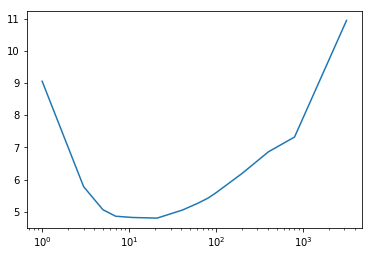

In [76]:
plt.plot(param_list, valid_mse_list)
plt.xscale('log')
plt.show()

#### **1e(ii):** Which value do you recommend?

21

#### **1e(iii):** Cumulative results table with K-Nearest Neighbor

**Mean Squared Error:**

| split |  guess mean | guess median | linear regr (2 feats) | linear regr (8 feats)| k-NN (8 feats)  |
| ----- | ----------- | ------------ | --------------------- | ---------------------| --------------  |
| train |     10.27   |    11.09     |       6.48            |     4.91             |  4.38
| valid |     10.95   |    11.99     | 6.52                  |     5.11             |  4.80
| test  |     10.56   |    11.60     | 6.74                  |     4.39             |  4.54

# <a name="problem-1-g"> 1f: Analyzing Residuals

In [77]:
# TODO compute the predicted y values for linear regr and kNN

#### **1f(i):** Plot scatters of y vs yhat for linear regression and the best k-NN regressor


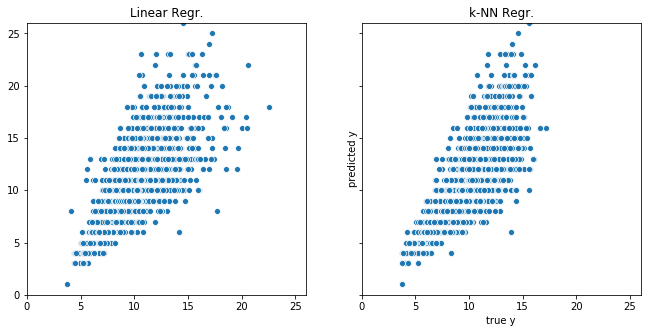

In [78]:
fig_h, ax_grid = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(11,5))
plt.xlim([0, 26]); plt.ylim([0, 26]);

# ax_grid[0].plot(y_va_N, linear_yhat_va_N, 'k.', alpha=0.2);
ax_grid[0].set_title('Linear Regr.'); plt.xlabel('true y'); plt.ylabel('predicted y');
sns.scatterplot(linear_regressor_8feats.predict(x_tr_NF),y_tr_N, ax=ax_grid[0]);

# ax_grid[1].plot(y_va_N, knn_yhat_va_N, 'k.', alpha=0.2);
plt.title('k-NN Regr.'); plt.xlabel('true y'); plt.ylabel('predicted y');
sns.scatterplot(knn_regr21.predict(x_tr_NF),y_tr_N, ax=ax_grid[1]);

#### **1f(ii):** What kinds of systematic errors does each method make? What should be done about these?


There are some outliers between 10 and 20. Those extreme point should be "penalized", so that they affect less on the training result.

--------------------------------------------------------------------------------------------------------------------------

# Problem 2 : Analysis of Doctor Visits

In [79]:
# TODO load data here
y_tr_N = np.loadtxt('data_doctorvisits/y_train.csv', delimiter=',', skiprows=1)
y_va_N = np.loadtxt('data_doctorvisits/y_valid.csv', delimiter=',', skiprows=1)
y_te_N = np.loadtxt('data_doctorvisits/y_test.csv' , delimiter=',', skiprows=1)
x_tr_NF = np.loadtxt('data_doctorvisits/x_train.csv', delimiter=',', skiprows=1)
x_va_NF = np.loadtxt('data_doctorvisits/x_valid.csv', delimiter=',', skiprows=1)
x_te_NF = np.loadtxt('data_doctorvisits/x_test.csv' , delimiter=',', skiprows=1)

# 2c : Baseline predictions

#### **2c(i):**Which error metric is most appropriate and why?

Because errors should scale linearly, we should use the *mean absolute error* metric.

If we used mean squared error, an error of 2 would cost 4x an error of 1.

In [18]:
mean_value_predictor = MeanPredictor()
mean_value_predictor.fit(x_tr_NF, y_tr_N)
#print(median_value_predictor.predict(2)) #test
calc_perf_metrics_for_regressor_on_dataset(mean_value_predictor, x_tr_NF, y_tr_N, 'Train', ['mse','mae']);
calc_perf_metrics_for_regressor_on_dataset(mean_value_predictor, x_va_NF, y_va_N, 'Validation', ['mse','mae']);
calc_perf_metrics_for_regressor_on_dataset(mean_value_predictor, x_te_NF, y_te_N, 'Test', ['mse','mae']);

===== Train
  squared error   45.97
  absolute error   4.49
===== Validation
  squared error   50.06
  absolute error   4.70
===== Test
  squared error   39.31
  absolute error   4.42


In [19]:
median_value_predictor = MedianPredictor()
median_value_predictor.fit(x_tr_NF, y_tr_N)
#print(median_value_predictor.predict(2)) #test
calc_perf_metrics_for_regressor_on_dataset(median_value_predictor, x_tr_NF, y_tr_N, 'Train', ['mse','mae']);
calc_perf_metrics_for_regressor_on_dataset(median_value_predictor, x_va_NF, y_va_N, 'Validation', ['mse','mae']);
calc_perf_metrics_for_regressor_on_dataset(median_value_predictor, x_te_NF, y_te_N, 'Test', ['mse','mae']);

===== Train
  squared error   48.94
  absolute error   4.23
===== Validation
  squared error   54.50
  absolute error   4.48
===== Test
  squared error   42.36
  absolute error   4.15


#### 2c(ii) : Results Table for Doctor Visits with Mean Absolute Error

**Mean Absolute Error:**

| split |  guess-mean | guess-median |
| ----- | ----------- | ------------ |
| train |      4.49   |     4.23     |
| valid |      4.70   |     4.48     |
| test  |      4.42   |     4.15     |

# Setup code for 2d

In [20]:
linear_regressor_2feats = LeastSquaresLinearRegressor()
TwoFeats=np.column_stack((x_tr_NF[:,0], x_tr_NF[:,3]))
linear_regressor_2feats.fit(TwoFeats, y_tr_N)
calc_perf_metrics_for_regressor_on_dataset(linear_regressor_2feats, TwoFeats, y_tr_N, 'Train', ['mse','mae']);
calc_perf_metrics_for_regressor_on_dataset(linear_regressor_2feats, x_va_NF[:,[0,3]], y_va_N, 'Validation', ['mse','mae']);
calc_perf_metrics_for_regressor_on_dataset(linear_regressor_2feats, x_te_NF[:,[0,3]], y_te_N, 'Test', ['mse','mae']);

===== Train
  squared error   45.23
  absolute error   4.43
===== Validation
  squared error   49.19
  absolute error   4.68
===== Test
  squared error   38.98
  absolute error   4.41


In [21]:
linear_regressor_10feats = LeastSquaresLinearRegressor()
linear_regressor_10feats.fit(x_tr_NF, y_tr_N)

#linear_regressor_2feats.print_weights_in_sorted_order()
calc_perf_metrics_for_regressor_on_dataset(linear_regressor_10feats, x_tr_NF, y_tr_N, 'Train', ['mse','mae']);
calc_perf_metrics_for_regressor_on_dataset(linear_regressor_10feats, x_va_NF, y_va_N, 'Validation', ['mse','mae']);
calc_perf_metrics_for_regressor_on_dataset(linear_regressor_10feats, x_te_NF, y_te_N, 'Test', ['mse','mae']);

===== Train
  squared error   41.72
  absolute error   4.13
===== Validation
  squared error   44.75
  absolute error   4.31
===== Test
  squared error   33.80
  absolute error   4.09


** 2d(i) and 2d(ii):** Add LR to Results Table for MAE on DoctorVisits

**Mean Absolute Error:**

| split |  guess-mean | guess-median | linear regr (2 feats) | linear regr (10 feats) |
| ----- | ----------- | ------------ | --------------------- | ---------------------- |
| train |      4.49   |     4.23     |                   4.43|                    4.13|
| valid |      4.70   |     4.48     |                   4.68|                   4.31 |
| test  |      4.42   |     4.15     |                   4.41|                   4.09 |

** 2b(iii):** Does using more features seem worthwhile? Why or why not?

No, the change is pretty small adding 8 more features.

# 2e : DecisionTreeRegressor 

In [87]:
param_name = 'min_samples_leaf'
param_list = [1, 2, 3, 4, 5, 10, 20, 50, 100, 200, 500, 1000, y_tr_N.size] # TODO add size of training set

In [97]:
train_mae_list = []
valid_mae_list = []
test_mae_list = []
for param in param_list:
    tree_regr = sklearn.tree.DecisionTreeRegressor(
        criterion='mse',
        min_samples_leaf=param,
        random_state=42)
    # Fit
    tree_regr.fit(x_tr_NF, y_tr_N)
    
    # predict and evaluation:
    train_mae_list.append(calc_perf_metric__absolute_error(tree_regr.predict(x_tr_NF),y_tr_N))
    valid_mae_list.append(calc_perf_metric__absolute_error(tree_regr.predict(x_va_NF),y_va_N))
    test_mae_list.append(calc_perf_metric__absolute_error( tree_regr.predict(x_te_NF),y_te_N))
#print (valid_mae_list)

#### 2e(i): Line plot of mean absolute error vs min_samples_leaf

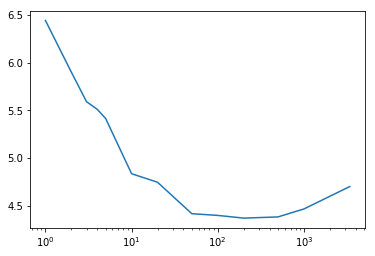

In [89]:
plt.plot(param_list, valid_mae_list)
plt.xscale('log')
plt.show()

#### **2e(ii):** Which value of min_samples_leaf would you recommend?


50

In [91]:
tree_regr50 = sklearn.tree.DecisionTreeRegressor(
        criterion='mse',
        min_samples_leaf=50,
        random_state=42)
tree_regr50.fit(x_tr_NF, y_tr_N)
mae50tr=calc_perf_metric__absolute_error(tree_regr50.predict(x_tr_NF),y_tr_N)
mae50va=calc_perf_metric__absolute_error(tree_regr50.predict(x_va_NF),y_va_N)
mae50te=calc_perf_metric__absolute_error(tree_regr50.predict(x_te_NF),y_te_N)
print (mae50tr, " ", mae50va, " ",mae50te)

4.080510815151853   4.418333770231707   4.292183646912621


#### 2e(iii): Add a column to the results table for MAE on DoctorVisits

**Mean Absolute Error:**


| split |  guess-mean | guess-median | linear regr (2 feats) | linear regr (10 feats) | decision tree
| ----- | ----------- | ------------ | --------------------- | ---------------------- | --- |
| train |      4.49   |     4.23     |                   4.43|                    4.13| 4.08| 
| valid |      4.70   |     4.48     |                   4.68|                   4.31 | 4.42|
| test  |      4.42   |     4.15     |                   4.41|                   4.09 | 4.29|

# 2f : DecisionTreeRegressor with MAE Training Criterion

In [92]:
train_mae_list = []
valid_mae_list = []
test_mae_list = []
for param in param_list:
    tree_regr = sklearn.tree.DecisionTreeRegressor(
        criterion='mae', # USE MEAN ABSOLUTE ERROR here
        min_samples_leaf=param,
        random_state=42)
    
    tree_regr.fit(x_tr_NF, y_tr_N)
    
    # predict and evaluation:
    train_mae_list.append(calc_perf_metric__absolute_error(tree_regr.predict(x_tr_NF),y_tr_N))
    valid_mae_list.append(calc_perf_metric__absolute_error(tree_regr.predict(x_va_NF),y_va_N))
    test_mae_list.append(calc_perf_metric__absolute_error( tree_regr.predict(x_te_NF),y_te_N))
#print (valid_mae_list)

#### 2f(i): Line plot of mean absolute error vs min_samples_leaf

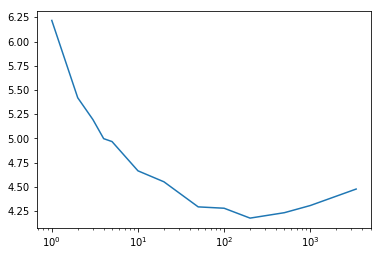

In [93]:
plt.plot(param_list, valid_mae_list)
plt.xscale('log')
plt.show()

#### 2f(ii): Which value would you recommend?

200

In [96]:
#print(train_mae_list[9], valid_mae_list[9], test_mae_list[9])

#### Setup for 2f(iii)

#### 2f(iii): Add a column to the results table for MAE on DoctorVisits


**Mean Absolute Error:**


| split |  guess-mean | guess-median | linear regr (2 feats) | linear regr (10 feats) | decision tree (MSE) | decision tree (MAE)
| ----- | ----------- | ------------ | --------------------- | ---------------------- | --- | --- |
| train |      4.49   |     4.23     |                   4.43|                    4.13| 4.16| 3.93| 
| valid |      4.70   |     4.48     |                   4.68|                   4.31 | 4.37| 4.18|
| test  |      4.42   |     4.15     |                   4.41|                   4.09 | 4.20| 4.02|

#### 2f(iv) Read the sklearn documentation for DecisionTreeRegressor. Why is there a noticeable change in performance between 2d and 2c? What was the default criterion used in 2c? What makes the approach in 2d better for this task?

The value of parameter changed from 50 to 100, as the measure of distance(metric) changed from  default mse to mae.  
2c uses default criterion, which is mse.  
Because errors should scale linearly, we should use the *mean absolute error* metric. If we used mean squared error, an error of 2 would cost 4x an error of 1.

# Problem 3: Concept questions

# 3a: Limits of $K$-NN

**Question**: When $K$ equals the total training set size $N$, the $K$-nearest-neighbor regression algorithm approaches the behavior of which other regression method discussed here?

#### 3a Answer:

Mean Value predictor (Guess_Mean)

# 3b: Modifications of $K$-NN

**Question**: Suppose in problem 2, when trying to minimize *mean absolute error* on heldout data, that instead of a DecisionTreeRegressor, we had used a $K$-NN regressor with Euclidean distance (as in Problem 1f).  

Would we expect $K$-NN with large $K$ to always beat the strongest constant-prediction baseline (e.g. guess-median or guess-mean)?

To get better MAE values using a nearest-neighbor like approach, should we change the distance function used to compute neighbors? Would we need to change some other step of the $K$-NN prediction process?


#### 3b Answer:

(1) Yes, as long as the features x recorded are related to the y value. If we have a very weired dataset that the objects with very similar features has very different values, K-NN might not be conclusive. However, this simply means the dataset is bad.  
 
(2) No, changing distance function is a bad idea, as it only changes the value but relative distance is not changed in general.(i.e if a is close to b, they are still close to each other compared with all data points after changing the function.)  
The thing we could do is to scale all the factors in x into the same level of magnitude during preprocessing. That will avoid a factor with large numbers affecting too much on the result.

# 3c: Linear Regression with Categorical Features

**Question:** Your colleague trains a linear regression model on a subset of the DoctorVisits data using only the `has_medicaid` and `has_private_insurance` features. Thus, all features in the vector have a binary categorical type and can be represented via a redundant one-hot encoding. 

To your dismay, you discover that your colleague failed to include a bias term (aka intercept term) when training the weights. You recall from class that including a bias term can be important.

To be concrete, you wish each example $x_i$ was represented as a (bias-included) vector:
$$
x_i = [
    \texttt{has_medicaid}
    \quad \texttt{has_private_insurance}
    \quad 1
] \quad \quad \quad ~
$$

However, your colleague used the following representation:
$$
\tilde{x}_i = [
    \texttt{has_medicaid}
    \quad \texttt{not(has_medicaid)}
    \quad \texttt{has_private_insurance}
    \quad \texttt{not(has_private_insurance)} 
]
$$

Your colleague has delivered to you a length-4 feature vector $\tilde{w}$ for the 4 features above, but then left for vacation without giving you access to the training data.

Can you manipulate the $\tilde{w}$ vector to estimate an appropriate $w$ and $b$ such that for all possible inputs $x_i$:

$$
    w^T x_i + b = \tilde{w}^T \tilde{x}_i
$$

#### 3c Answer:

We know that for a data $x_i=(x^1,x^2)$, $\tilde{x}_i=(\tilde{x}^1,\tilde{x}^2,\tilde{x}^3,\tilde{x}^4)$
$$
\tilde{x}_1=x_1\\
\tilde{x}_3=x_2\\
\tilde{x}_2= 1-\tilde{x}_1=1-x_1; \\
\tilde{x}_4= 1-\tilde{x}_3=1-x_2;
$$
Hence, for $w=(w_1,w_2)$, $\tilde{w}=(\tilde{w}_1,\tilde{w}_2, \tilde{w}_3,\tilde{w}_4)$
$$
\begin{align}
w_1*x^1+w_2*x^2+b&=\tilde{w}_1*x^1+\tilde{w}_2*(1-x^1)+\tilde{w}_3*x^2+\tilde{w}_4*(1-x^2) \\
                   &=(\tilde{w}_1-\tilde{w}_2)*x^1+\tilde{w}_2+(\tilde{w}_3-\tilde{w}_4)*x^2+\tilde{w}_4\\
                   &=(\tilde{w}_1-\tilde{w}_2)*x^1+(\tilde{w}_3-\tilde{w}_4)*x^2+(\tilde{w}_2+\tilde{w}_4)
\end{align}
$$  

Thus, we only need to match the weight of $x^1$ and $x^2$, so $w=(w_1,w_2)$ and b are: 

$w_1= \tilde{w}_1-\tilde{w}_2$; 
$w_2= \tilde{w}_3-\tilde{w}_4$; 
$b= \tilde{w}_2+\tilde{w}_4$.